In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the dataset (assuming the same structure as in the training script)
training_set_norm = pd.read_csv('../Dataset/training_set.csv', sep=';')
testing_set_norm = pd.read_csv('../Dataset/testing_set.csv', sep=';')

In [3]:
X = pd.concat([training_set_norm.drop(['y'], axis=1), testing_set_norm.drop(['y'], axis=1)])
y = pd.concat([training_set_norm['y'], testing_set_norm['y']])

# Split the data into training and testing sets (assuming same random state for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)


In [4]:
# Apply the logarithmic transformation to y_train and y_test
y_train_max = np.max(np.log10(10*y_train))
y_train = np.log10(10*y_train) / y_train_max
y_test = np.log10(10*y_test) / y_train_max

# Use the powertransformer to transform features
pt = PowerTransformer()
pt.fit(X_train)  # Fit only on training data
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

Mean squared error: 0.00146956
Mean absolute error: 0.02956090
Variance score (Train): 0.91936403
Variance score (Test): 0.91917478


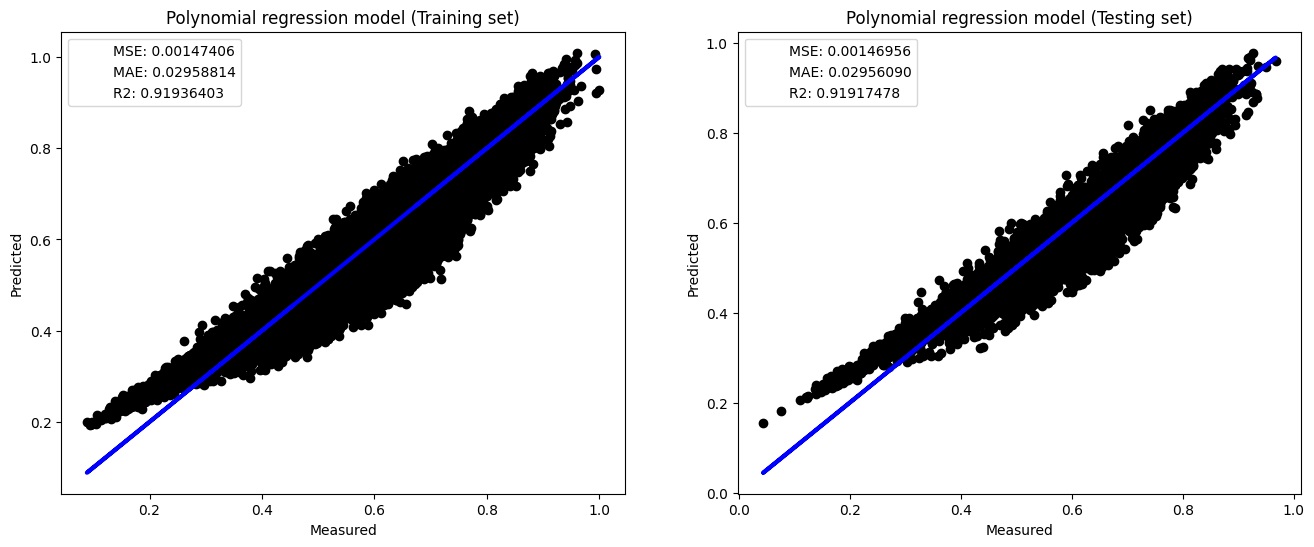

In [5]:
# Load the saved model pol_reg1.sav
filename1 = '../trained_models/pol_reg1.sav'
pol_reg1 = pickle.load(open(filename1, 'rb'))

poly_reg1 = pickle.load(open('../trained_models/pol_reg1_features.sav', 'rb'))
X_train_poly1 = poly_reg1.transform(X_train)
X_test_poly1 = poly_reg1.transform(X_test)

# Predict the test data
y_pred1 = pol_reg1.predict(X_test_poly1)

# Evaluate the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred1))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred1))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg1.predict(X_train_poly1)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred1))

# Plot the results
# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axs[0].scatter(y_train, pol_reg1.predict(X_train_poly1), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg1.predict(X_train_poly1)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg1.predict(X_train_poly1)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg1.predict(X_train_poly1)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred1, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred1))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred1))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred1))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()

Mean squared error: 0.00034975
Mean absolute error: 0.01334284
Variance score (Train): 0.98122420
Variance score (Test): 0.98076376


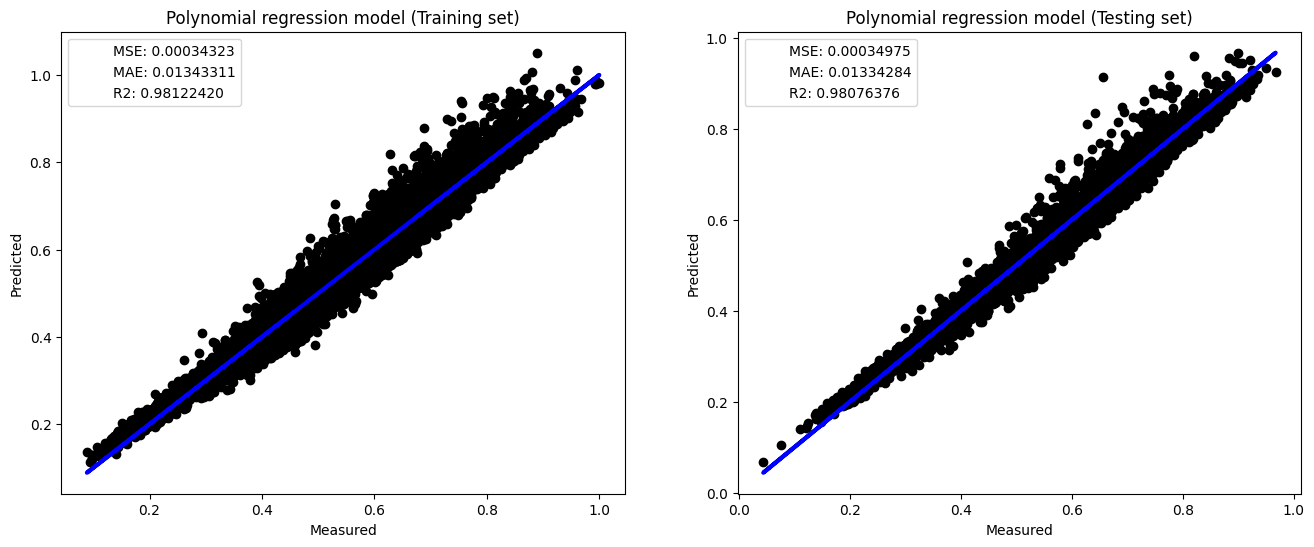

In [6]:
# Load the saved model pol_reg2.sav
filename2 = '../trained_models/pol_reg2.sav'
pol_reg2 = pickle.load(open(filename2, 'rb'))

poly_reg2 = pickle.load(open('../trained_models/pol_reg2_features.sav', 'rb'))
X_train_poly2 = poly_reg2.transform(X_train)
X_test_poly2 = poly_reg2.transform(X_test)

# Predict the test data
y_pred2 = pol_reg2.predict(X_test_poly2)

# Evaluate the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred2))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred2))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg2.predict(X_train_poly2)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred2))

# Plot the results
# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axs[0].scatter(y_train, pol_reg2.predict(X_train_poly2), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg2.predict(X_train_poly2)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg2.predict(X_train_poly2)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg2.predict(X_train_poly2)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred2, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred2))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred2))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred2))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()

Mean squared error: 0.00008814
Mean absolute error: 0.00655904
Variance score (Train): 0.99517183
Variance score (Test): 0.99515213


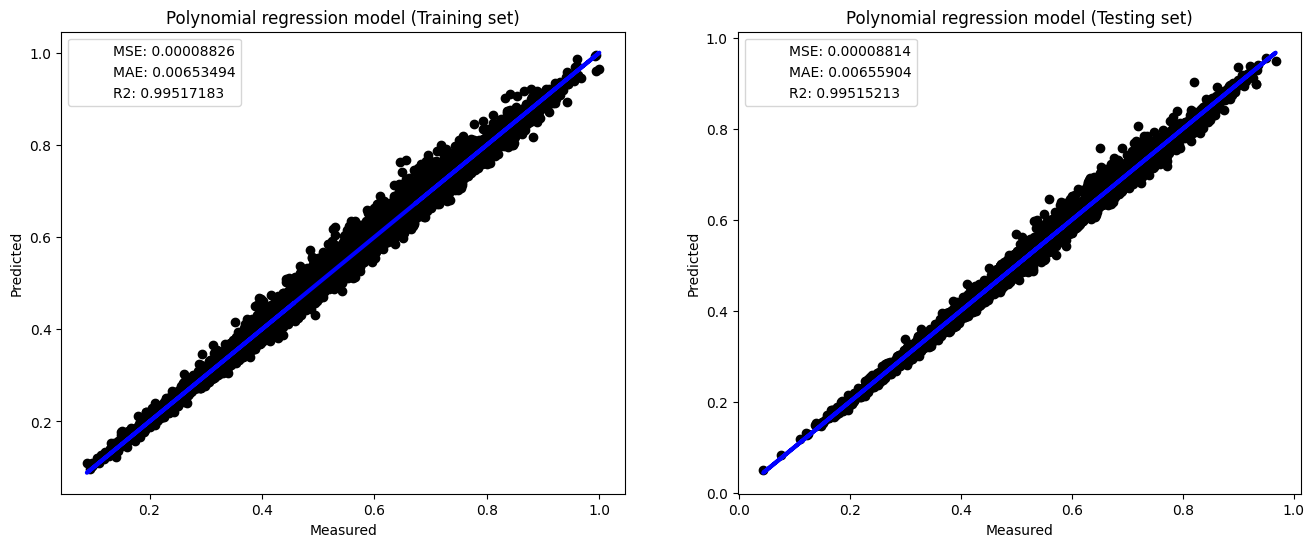

In [7]:
# Load the saved model pol_reg3.sav
filename3 = '../trained_models/pol_reg3.sav'
pol_reg3 = pickle.load(open(filename3, 'rb'))

poly_reg3 = pickle.load(open('../trained_models/pol_reg3_features.sav', 'rb'))
X_train_poly3 = poly_reg3.transform(X_train)
X_test_poly3 = poly_reg3.transform(X_test)

# Predict the test data
y_pred3 = pol_reg3.predict(X_test_poly3)

# Evaluate the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred3))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred3))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg3.predict(X_train_poly3)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred3))

# Plot the results
# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axs[0].scatter(y_train, pol_reg3.predict(X_train_poly3), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg3.predict(X_train_poly3)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg3.predict(X_train_poly3)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg3.predict(X_train_poly3)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred3, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred3))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred3))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred3))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()

/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Mean squared error: 0.00003728
Mean absolute error: 0.00396505
Variance score (Train): 0.99808835
Variance score (Test): 0.99794964


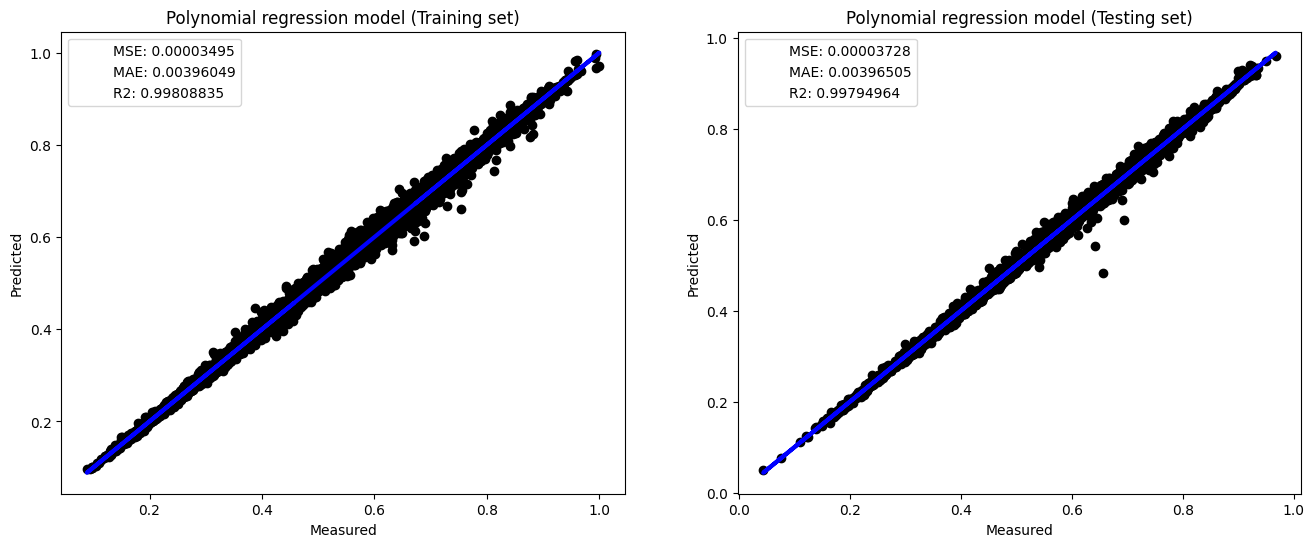

In [8]:
# Load the saved model pol_reg4.sav
filename4 = '../trained_models/pol_reg4.sav'
pol_reg4 = pickle.load(open(filename4, 'rb'))

poly_reg4 = pickle.load(open('../trained_models/pol_reg4_features.sav', 'rb'))
X_train_poly4 = poly_reg4.transform(X_train)
X_test_poly4 = poly_reg4.transform(X_test)

# Predict the test data
y_pred4 = pol_reg4.predict(X_test_poly4)

# Evaluate the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred4))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred4))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg4.predict(X_train_poly4)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred4))

# Plot the results
# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axs[0].scatter(y_train, pol_reg4.predict(X_train_poly4), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg4.predict(X_train_poly4)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg4.predict(X_train_poly4)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg4.predict(X_train_poly4)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred4, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred4))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred4))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred4))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()

/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Mean squared error: 0.00001756
Mean absolute error: 0.00268577
Variance score (Train): 0.99918245
Variance score (Test): 0.99903398


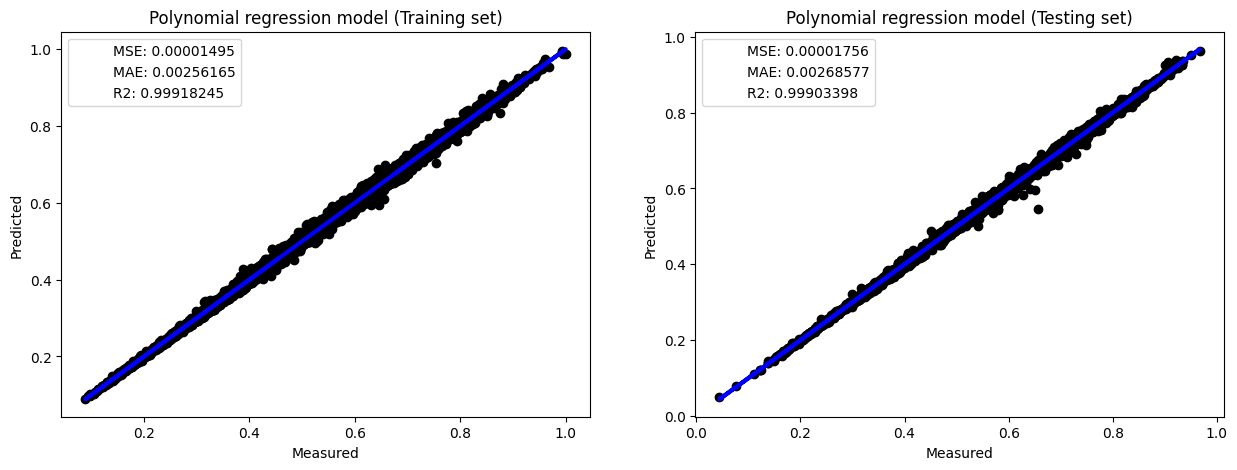

In [9]:
# Load the saved model pol_reg5.sav
filename5 = '../trained_models/pol_reg5.sav'
pol_reg5 = pickle.load(open(filename5, 'rb'))


# # Prepare the test data with the same polynomial features
# poly_reg5 = PolynomialFeatures(degree=5)
# X_train_poly5 = poly_reg5.transform(X_train)
# X_test_poly5 = poly_reg5.transform(X_test)

poly_reg5 = pickle.load(open('../trained_models/pol_reg5_features.sav', 'rb'))
X_train_poly5 = poly_reg5.transform(X_train)
X_test_poly5 = poly_reg5.transform(X_test)

# Predict the test data
y_pred5 = pol_reg5.predict(X_test_poly5)

# Evaluate the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred5))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred5))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg5.predict(X_train_poly5)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred5))

# Plot the results
# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axs[0].scatter(y_train, pol_reg5.predict(X_train_poly5), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg5.predict(X_train_poly5)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg5.predict(X_train_poly5)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg5.predict(X_train_poly5)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred5, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred5))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred5))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred5))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()

/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Mean squared error: 0.00000879
Mean absolute error: 0.00191215
Variance score (Train): 0.99965604
Variance score (Test): 0.99951631


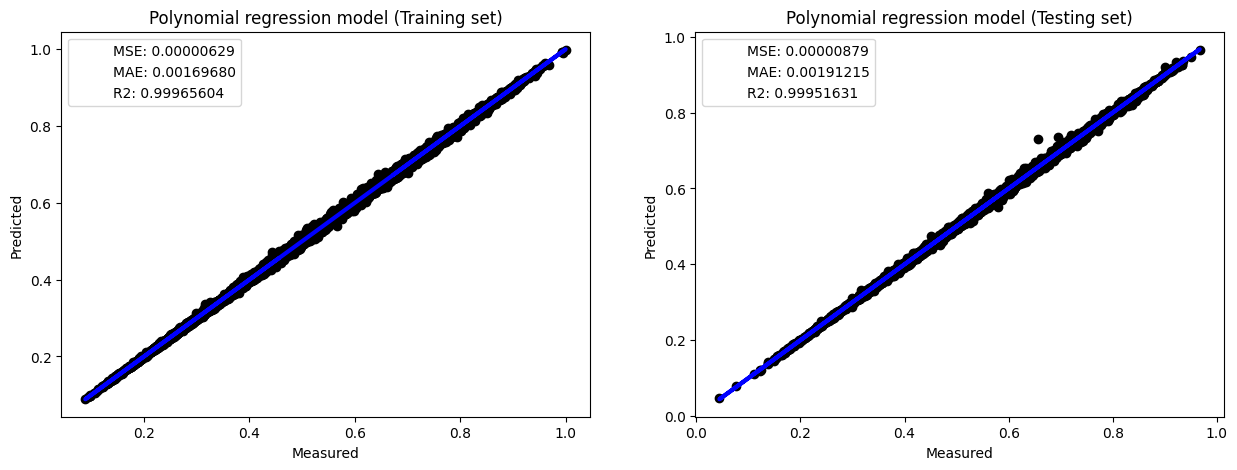

In [10]:
# Load the saved model pol_reg6.sav
filename6 = '../trained_models/pol_reg6.sav'
pol_reg6 = pickle.load(open(filename6, 'rb'))

poly_reg6 = pickle.load(open('../trained_models/pol_reg6_features.sav', 'rb'))
X_train_poly6 = poly_reg6.transform(X_train)
X_test_poly6 = poly_reg6.transform(X_test)

# Predict the test data
y_pred6 = pol_reg6.predict(X_test_poly6)

# Evaluate the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred6))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred6))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg6.predict(X_train_poly6)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred6))

# Plot the results
# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axs[0].scatter(y_train, pol_reg6.predict(X_train_poly6), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg6.predict(X_train_poly6)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg6.predict(X_train_poly6)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg6.predict(X_train_poly6)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred6, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred6))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred6))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred6))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()

/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hugo/.local/lib/python3.10/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PolynomialFeatures from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Mean squared error: 0.00000973
Mean absolute error: 0.00150236
Variance score (Train): 0.99986107
Variance score (Test): 0.99946511


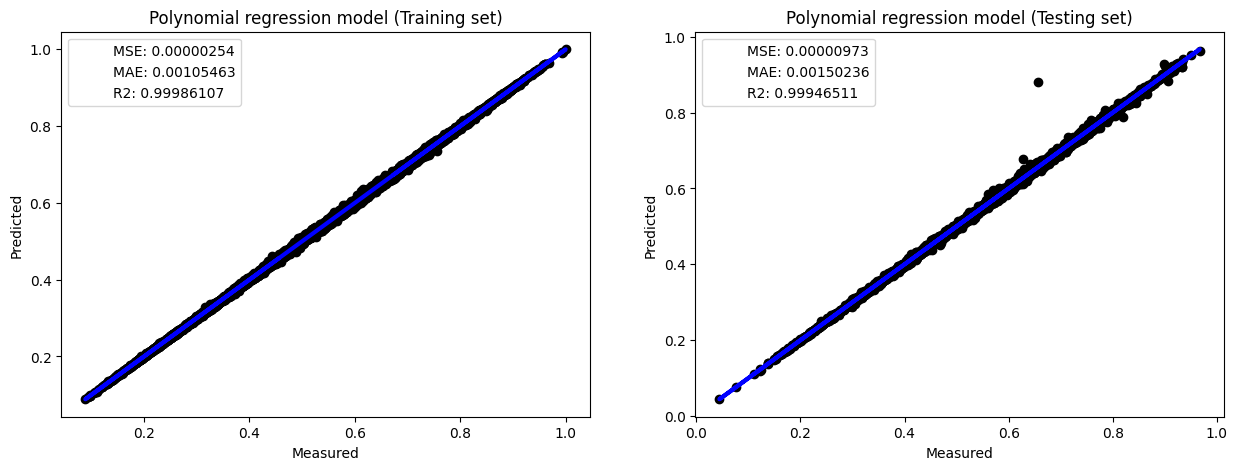

In [11]:
# Load the saved model pol_reg7.sav
filename7 = '../trained_models/pol_reg7.sav'
pol_reg7 = pickle.load(open(filename7, 'rb'))

poly_reg7 = pickle.load(open('../trained_models/pol_reg7_features.sav', 'rb'))
X_train_poly7 = poly_reg7.transform(X_train)
X_test_poly7 = poly_reg7.transform(X_test)

# Predict the test data
y_pred7 = pol_reg7.predict(X_test_poly7)

# Evaluate the model
# The mean squared error
print("Mean squared error: %.8f" % mean_squared_error(y_test, y_pred7))
# The mean absolute error
print("Mean absolute error: %.8f" % mean_absolute_error(y_test, y_pred7))
# Explained variance score: 1 is perfect prediction
print('Variance score (Train): %.8f' % r2_score(y_train, pol_reg7.predict(X_train_poly7)))
print('Variance score (Test): %.8f' % r2_score(y_test, y_pred7))

# Plot the results
# Plot outputs
figs, axs = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axs[0].scatter(y_train, pol_reg7.predict(X_train_poly7), color='black')
axs[0].plot(y_train, y_train, color='blue', linewidth=3)
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Polynomial regression model (Training set)')
# Creating empty lines for legend entries
lin1, = axs[0].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_train, pol_reg7.predict(X_train_poly7)))
lin2, = axs[0].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_train, pol_reg7.predict(X_train_poly7)))
lin3, = axs[0].plot([], [], 'none', label="R2: %.8f" % r2_score(y_train, pol_reg7.predict(X_train_poly7)))
axs[0].legend(handles=[lin1, lin2, lin3])

# Testing set
axs[1].scatter(y_test, y_pred7, color='black')
axs[1].plot(y_test, y_test, color='blue', linewidth=3)
axs[1].set_xlabel('Measured')
axs[1].set_ylabel('Predicted')
axs[1].set_title('Polynomial regression model (Testing set)')
# Creating empty lines for legend entries
lin1, = axs[1].plot([], [], 'none', label="MSE: %.8f" % mean_squared_error(y_test, y_pred7))
lin2, = axs[1].plot([], [], 'none', label="MAE: %.8f" % mean_absolute_error(y_test, y_pred7))
lin3, = axs[1].plot([], [], 'none', label="R2: %.8f" % r2_score(y_test, y_pred7))
axs[1].legend(handles=[lin1, lin2, lin3])

plt.show()